# Comenzamos primero con la carga de librerias necesarias para el entrenamiento del modelo

In [1]:
import pandas
import matplotlib.pyplot as plt
import keras
import tensorflow.keras.optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Primer preprocesamiento simple, acorde al TP1

In [2]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica

df, df_holdout = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)


# acá solo convierto simplemente a numerico.. primer preprocessing!
X_df = conversion_numerica(X_df) 


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=30,stratify=y_df)

## Por el momento solo aplico ese primer preprocesamiento

In [4]:
X_train.values

array([[17, 60,  5, ...,  0,  0,  0],
       [17, 39,  5, ...,  0,  0,  0],
       [18, 50,  6, ...,  0,  0,  0],
       ...,
       [14, 50,  4, ...,  0,  0,  0],
       [ 8, 29,  2, ...,  0,  0,  0],
       [17, 25,  5, ...,  0,  0,  0]])

# En primer lugar diseño la red

In [5]:
num_classes = 2

model = Sequential()
model.add(Dense(8,input_shape = (40,),activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


# Ya tengo el primer modelo compilado voy a entrenarlo

In [6]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [7]:
history = model.fit(X_train.values, y_train,epochs=3,verbose=1,validation_data=(X_test.values, y_test))

Epoch 1/3
814/814 [==============================] - 1s 1ms/step - loss: 0.5113 - accuracy: 0.7614 - val_loss: 0.4053 - val_accuracy: 0.8015
Epoch 2/3
814/814 [==============================] - 1s 725us/step - loss: 0.4032 - accuracy: 0.8014 - val_loss: 0.3806 - val_accuracy: 0.8121
Epoch 3/3
814/814 [==============================] - 1s 671us/step - loss: 0.3827 - accuracy: 0.8069 - val_loss: 0.3833 - val_accuracy: 0.8082


# Grafico evolución en función de epocs

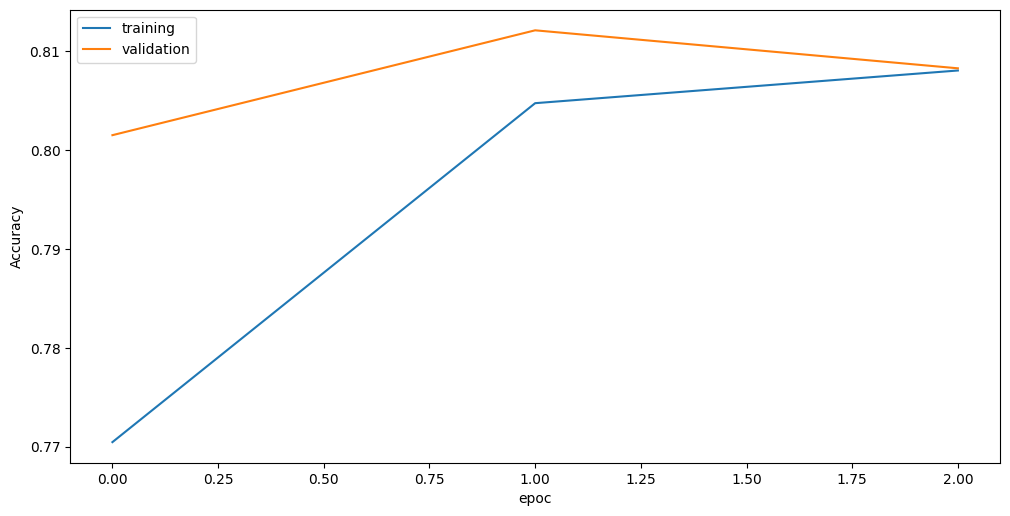

In [8]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

# Busco bajar el learning rate porque esta over shootiando, poner mas epocs y regularizo también

In [9]:
from keras.regularizers import l2

In [22]:
num_clases = 2
model = Sequential()
model.add(Dense(16, input_shape=(40,), activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_clases, activation="softmax"))





In [23]:
#opt = RMSprop(lr=0.0001)
opt = tensorflow.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',"AUC","Precision","Recall"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                656       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
Total params: 838
Trainable params: 838
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train.values, y_train,epochs=200,verbose=1,validation_data=(X_test.values, y_test))

Epoch 1/200
814/814 [==============================] - 2s 2ms/step - loss: 5.4486 - accuracy: 0.6058 - auc: 0.6109 - precision: 0.6058 - recall: 0.6058 - val_loss: 0.7158 - val_accuracy: 0.8115 - val_auc: 0.8889 - val_precision: 0.8115 - val_recall: 0.8115
Epoch 2/200
814/814 [==============================] - 1s 1ms/step - loss: 0.8425 - accuracy: 0.8124 - auc: 0.8890 - precision: 0.8124 - recall: 0.8124 - val_loss: 0.6389 - val_accuracy: 0.8208 - val_auc: 0.9047 - val_precision: 0.8208 - val_recall: 0.8208
Epoch 3/200
814/814 [==============================] - 1s 1ms/step - loss: 0.7373 - accuracy: 0.8240 - auc: 0.8994 - precision: 0.8240 - recall: 0.8240 - val_loss: 0.5186 - val_accuracy: 0.8274 - val_auc: 0.9111 - val_precision: 0.8274 - val_recall: 0.8274
Epoch 4/200
814/814 [==============================] - 1s 1ms/step - loss: 0.6241 - accuracy: 0.8286 - auc: 0.9026 - precision: 0.8286 - recall: 0.8286 - val_loss: 0.7435 - val_accuracy: 0.8303 - val_auc: 0.9022 - val_precision: 

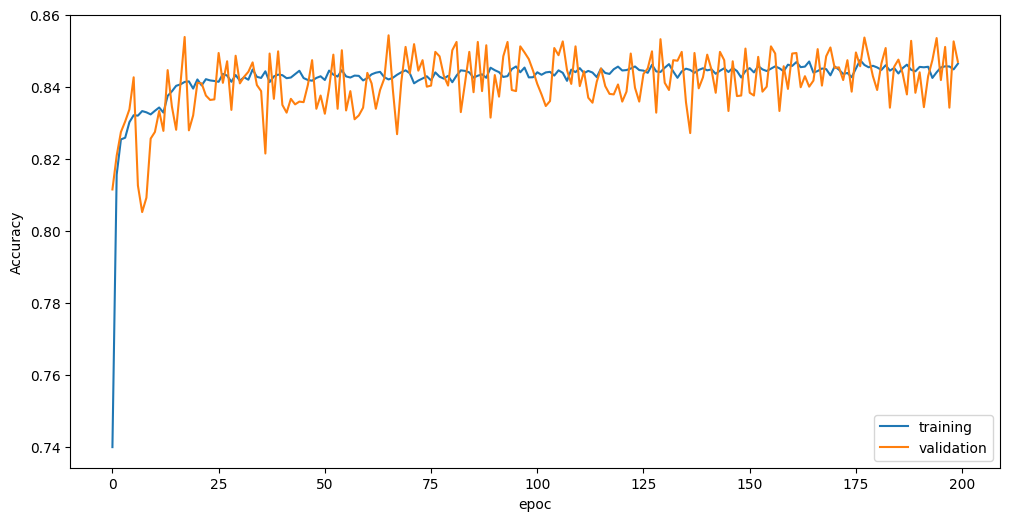

In [25]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

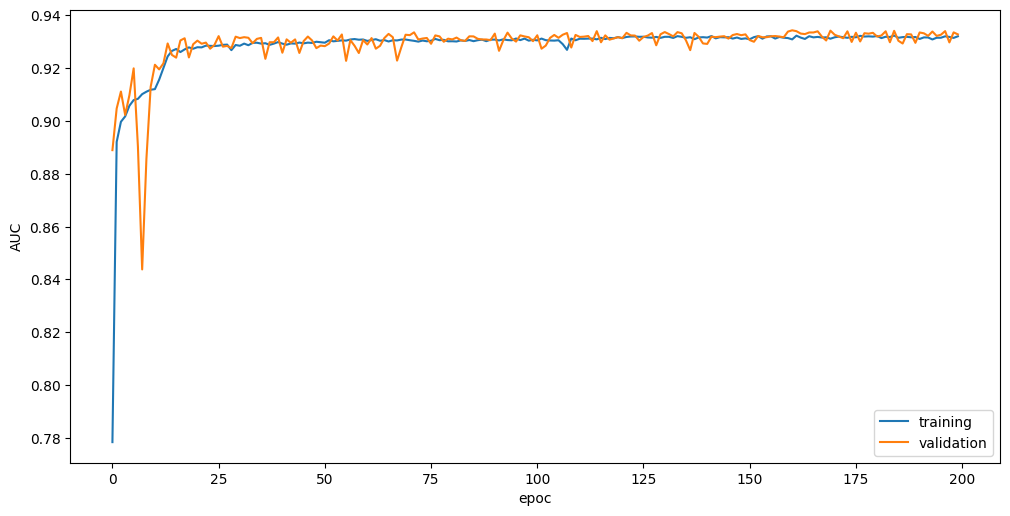

In [27]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("AUC")
plt.xlabel("epoc")
plt.plot(history.history["auc"], label="training")
plt.plot(history.history["val_auc"], label="validation")
plt.legend()

# Evaluo Modelo

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [16]:
prediccion = model.predict(X_train)

In [17]:
prediccion[:20]

array([[0.7395678 , 0.26043215],
       [0.39926603, 0.60073394],
       [0.39926603, 0.60073394],
       [0.91700304, 0.08299692],
       [0.98095876, 0.01904126],
       [0.7733559 , 0.22664407],
       [0.93974715, 0.06025277],
       [0.9471192 , 0.05288082],
       [0.6520789 , 0.34792104],
       [0.7217548 , 0.27824527],
       [0.84976506, 0.15023495],
       [0.39926603, 0.60073394],
       [0.6044754 , 0.39552465],
       [0.9735373 , 0.02646263],
       [0.5697813 , 0.4302187 ],
       [0.43701115, 0.5629888 ],
       [0.9966738 , 0.00332621],
       [0.96016055, 0.03983939],
       [0.1320411 , 0.86795896],
       [0.45465484, 0.5453451 ]], dtype=float32)

# Conclusion parcial

Como dato: probe varios optimizadores y varios learning rates y varias configuraciones de redes. El optimizador es este o el adam. El learning rate mas chicho no sirve y mas grande overshootea mucho. La red si la complejizas mas se va todo a la mierda rapidamente